In [1]:
%matplotlib inline


Training a Classifier
=====================

This is it. You have seen how to define neural networks, compute loss and make
updates to the weights of the network.

Now you might be thinking,

What about data?
----------------

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.*Tensor``.

-  For images, packages such as Pillow, OpenCV are useful
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy are useful

Specifically for vision, we have created a package called
``torchvision``, that has data loaders for common datasets such as
Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

.. figure:: /_static/img/cifar10.png
   :alt: cifar10

   cifar10


Training an image classifier
----------------------------

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolutional Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

1. Loading and normalizing CIFAR10
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Using ``torchvision``, it’s extremely easy to load CIFAR10.



In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

# to build a NN
import torch.nn as nn
import torch.nn.functional as F
# optimizers
import torch.optim as optim
# learning rate decay
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau

import matplotlib.pyplot as plt
import numpy as np

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].
<div class="alert alert-info"><h4>Note</h4><p>If running on Windows and you get a BrokenPipeError, try setting
    the num_worker of torch.utils.data.DataLoader() to 0.</p></div>



Let us show some of the training images, for fun.



2. Define a Convolutional Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Let's use a Classification Cross-Entropy loss and SGD with momentum. <br/>
3-1. [Learning rate scheduler](https://www.deeplearningwizard.com/deep_learning/boosting_models_pytorch/lr_scheduling/)



4. Train the network
^^^^^^^^^^^^^^^^^^^^

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



Device: cuda
Files already downloaded and verified
Train loader lenght: 12500
Files already downloaded and verified
Test loader lenght: 2500
Number of classes: 10
Image shape: torch.Size([3, 32, 32])
Conv1 bias:  Parameter containing:
tensor([0., 0., 0., 0., 0., 0.], device='cuda:0', requires_grad=True)


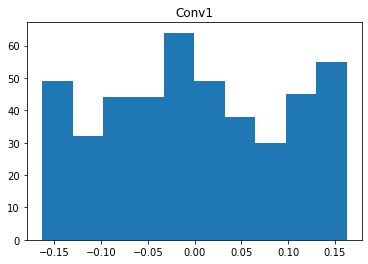

Conv3 bias:  Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0', requires_grad=True)


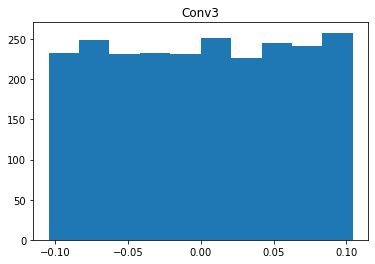

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [3]:
import cifar10_model as model
net_runner = model.RunNet(learning_rate_decay=False, epochs=10, learning_rate=0.001, print_every=2000, num_workers=2, batch_size=4)
net_runner.weights_init()
net_runner.plot_conv2d_weights()
print(net_runner.net)

img_shape: torch.Size([3, 36, 138])
img_shape: torch.Size([3, 36, 138])


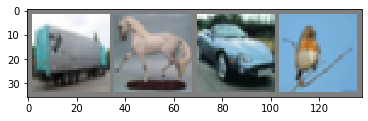

classes:  truckhorse  car bird


In [4]:
net_runner.inspect_data(net_runner.trainloader)

Let's quickly save our trained model:



In [5]:
net_runner.train() # pytorch sitesinde train loss= [2, 12000] loss: 1.290, accuracy= [2, 12000] 53%

Epoch: 1/10..  steps: 2000..  learning rate: 0.001  Train loss: 1.832..  Train accuracy: 0.000 Test loss: 1.700..  Test accuracy: 0.382
Epoch: 1/10..  steps: 4000..  learning rate: 0.001  Train loss: 1.601..  Train accuracy: 0.001 Test loss: 1.523..  Test accuracy: 0.435
Epoch: 1/10..  steps: 6000..  learning rate: 0.001  Train loss: 1.505..  Train accuracy: 0.001 Test loss: 1.405..  Test accuracy: 0.484
Epoch: 1/10..  steps: 8000..  learning rate: 0.001  Train loss: 1.437..  Train accuracy: 0.001 Test loss: 1.421..  Test accuracy: 0.492
Epoch: 1/10..  steps: 10000..  learning rate: 0.001  Train loss: 1.378..  Train accuracy: 0.001 Test loss: 1.347..  Test accuracy: 0.512
Epoch: 1/10..  steps: 12000..  learning rate: 0.001  Train loss: 1.372..  Train accuracy: 0.002 Test loss: 1.383..  Test accuracy: 0.508
Epoch: 2/10..  steps: 2000..  learning rate: 0.001  Train loss: 1.291..  Train accuracy: 0.002 Test loss: 1.274..  Test accuracy: 0.550
Epoch: 2/10..  steps: 4000..  learning rate: 0

Conv1 bias:  Parameter containing:
tensor([-0.2328, -0.2637, -0.2112,  0.1628, -0.4081, -0.3079], device='cuda:0',
       requires_grad=True)


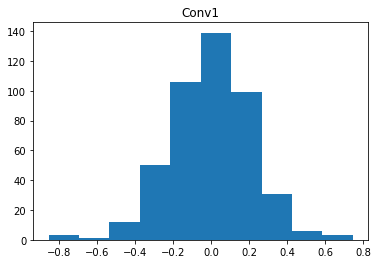

Conv3 bias:  Parameter containing:
tensor([ 2.0323e-01,  4.0297e-01, -4.9409e-04,  8.5436e-01,  5.7063e-01,
        -2.5301e-01, -4.0777e-01,  1.1482e-01,  2.7808e-01,  3.6431e-01,
        -8.5547e-01, -8.4091e-01,  1.1609e-01,  1.1674e-01, -6.1566e-01,
        -1.3514e-01], device='cuda:0', requires_grad=True)


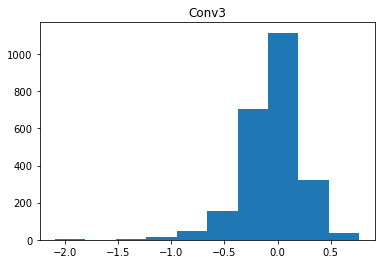

In [6]:
net_runner.plot_conv2d_weights()

In [7]:
PATH = './cifar_net.pth'
#torch.save(net.state_dict(), PATH)
net_runner.model_save(PATH)

See `here <https://pytorch.org/docs/stable/notes/serialization.html>`_
for more details on saving PyTorch models.

5. Test the network on the test data
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



img_shape: torch.Size([3, 36, 138])
img_shape: torch.Size([3, 36, 138])


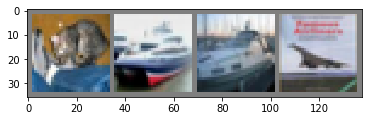

classes:    cat ship shipplane


In [8]:
#dataiter = iter(testloader)
#images, labels = dataiter.next()

# print images
#imshow(torchvision.utils.make_grid(images))
#print('GroundTruth: ', ' '.join('%5s' % net_runner.classes[labels[j]] for j in range(4)))

net_runner.inspect_data(net_runner.testloader)

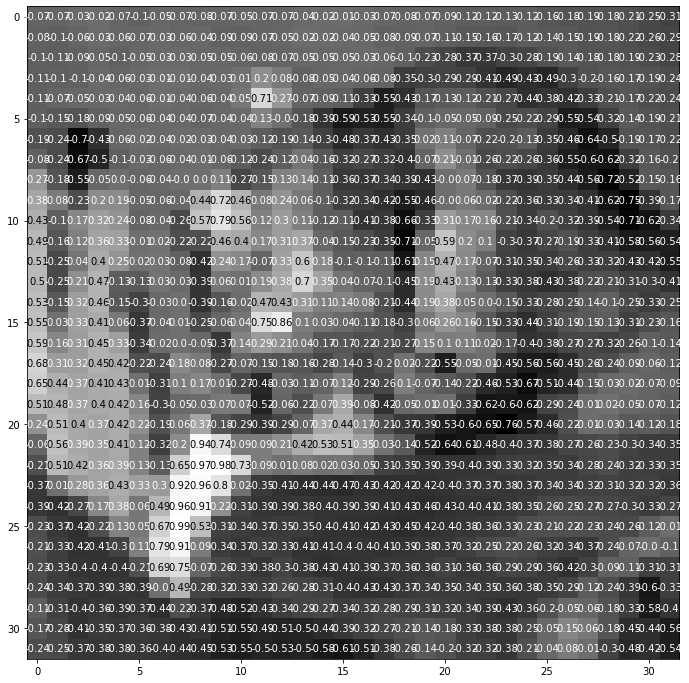

In [9]:
dataiter = iter(net_runner.testloader)
images, labels = dataiter.next()

net_runner.inspect_one_data(images)

Next, let's load back in our saved model (note: saving and re-loading the model
wasn't necessary here, we only did it to illustrate how to do so):



In [10]:
PATH = './cifar_net.pth'
net = model.Net()
# net.load_state_dict(torch.load(PATH))
net.load_state_dict(net_runner.model_load(PATH))

<All keys matched successfully>

Okay, now let us see what the neural network thinks these examples above are:



In [11]:
outputs = net(images)

The outputs are energies for the 10 classes.
The higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [12]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % net_runner.classes[predicted[j]]
                              for j in range(net_runner.batch_size)))

Predicted:    cat  ship  ship  ship


The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [13]:
correct = 0
total = 0
with torch.no_grad():
    for data in net_runner.testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 61 %


That looks way better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [14]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in net_runner.testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        net_runner.classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 59 %
Accuracy of   car : 65 %
Accuracy of  bird : 48 %
Accuracy of   cat : 48 %
Accuracy of  deer : 62 %
Accuracy of   dog : 45 %
Accuracy of  frog : 67 %
Accuracy of horse : 64 %
Accuracy of  ship : 81 %
Accuracy of truck : 70 %


# Cuda Computation
The rest of this section assumes that ``device`` is a CUDA device.

Then these methods will recursively go over all modules and convert their
parameters and buffers to CUDA tensors:

.. code:: python

    net.to(device)


Remember that you will have to send the inputs and targets at every step
to the GPU too:

.. code:: python

        inputs, labels = data[0].to(device), data[1].to(device)

Why dont I notice MASSIVE speedup compared to CPU? Because your network
is really small.

**Exercise:** Try increasing the width of your network (argument 2 of
the first ``nn.Conv2d``, and argument 1 of the second ``nn.Conv2d`` –
they need to be the same number), see what kind of speedup you get.

**Goals achieved**:

- Understanding PyTorch's Tensor library and neural networks at a high level.
- Train a small neural network to classify images

Training on multiple GPUs
-------------------------
If you want to see even more MASSIVE speedup using all of your GPUs,
please check out :doc:`data_parallel_tutorial`.

Where do I go next?
-------------------

-  :doc:`Train neural nets to play video games </intermediate/reinforcement_q_learning>`
-  `Train a state-of-the-art ResNet network on imagenet`_
-  `Train a face generator using Generative Adversarial Networks`_
-  `Train a word-level language model using Recurrent LSTM networks`_
-  `More examples`_
-  `More tutorials`_
-  `Discuss PyTorch on the Forums`_
-  `Chat with other users on Slack`_


